In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_SAMPLE = '/Users/macbook/Downloads/regression-tutors-expected-math-exam-results/sample_submission.csv'
PATH_TO_TRAIN = '/Users/macbook/Downloads/regression-tutors-expected-math-exam-results/train.csv'
PATH_TO_TEST = '/Users/macbook/Downloads/regression-tutors-expected-math-exam-results/test.csv'

In [3]:
df_sample_submition = pd.read_csv(PATH_TO_SAMPLE)
df_train = pd.read_csv(PATH_TO_TRAIN)
df_test = pd.read_csv(PATH_TO_TEST)

In [4]:
df_sample_submition.head()

,Id,mean_exam_points
0,10000,50.0
1,10001,50.0
2,10002,50.0
3,10003,50.0
4,10004,50.0


In [5]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [6]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_sample_submition.shape

(10000, 2)

In [8]:
df_train.shape

(10000, 12)

In [9]:
df_test.shape

(10000, 11)

In [10]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [11]:
def norm(x):
    max_value = x.max(axis=0)
    min_value = x.min(axis=0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [12]:
def determination(y, y_pred):
    r = 1
    r -= ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()
    return r

In [13]:
def get_plot(y_1, y_2, n):
    plt.plot(list(range(1, n)), y_1)
    plt.plot(list(range(1, n)), y_2)
    plt.show()

__Нормализуем данные__

In [14]:
X, y = df_train.loc[:, 'age':'history'], df_train.loc[:, 'mean_exam_points']

X = norm(X)

In [15]:
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,0.377778,0.0,0.320000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
1,0.555556,0.4,0.706667,0.666667,1.0,0.0,0.0,0.0,0.0,0.0
2,0.355556,0.0,0.266667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.511111,0.5,0.320000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.444444,0.1,0.346667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y.head()

0    61
1    76
2    53
3    54
4    57
Name: mean_exam_points, dtype: int64

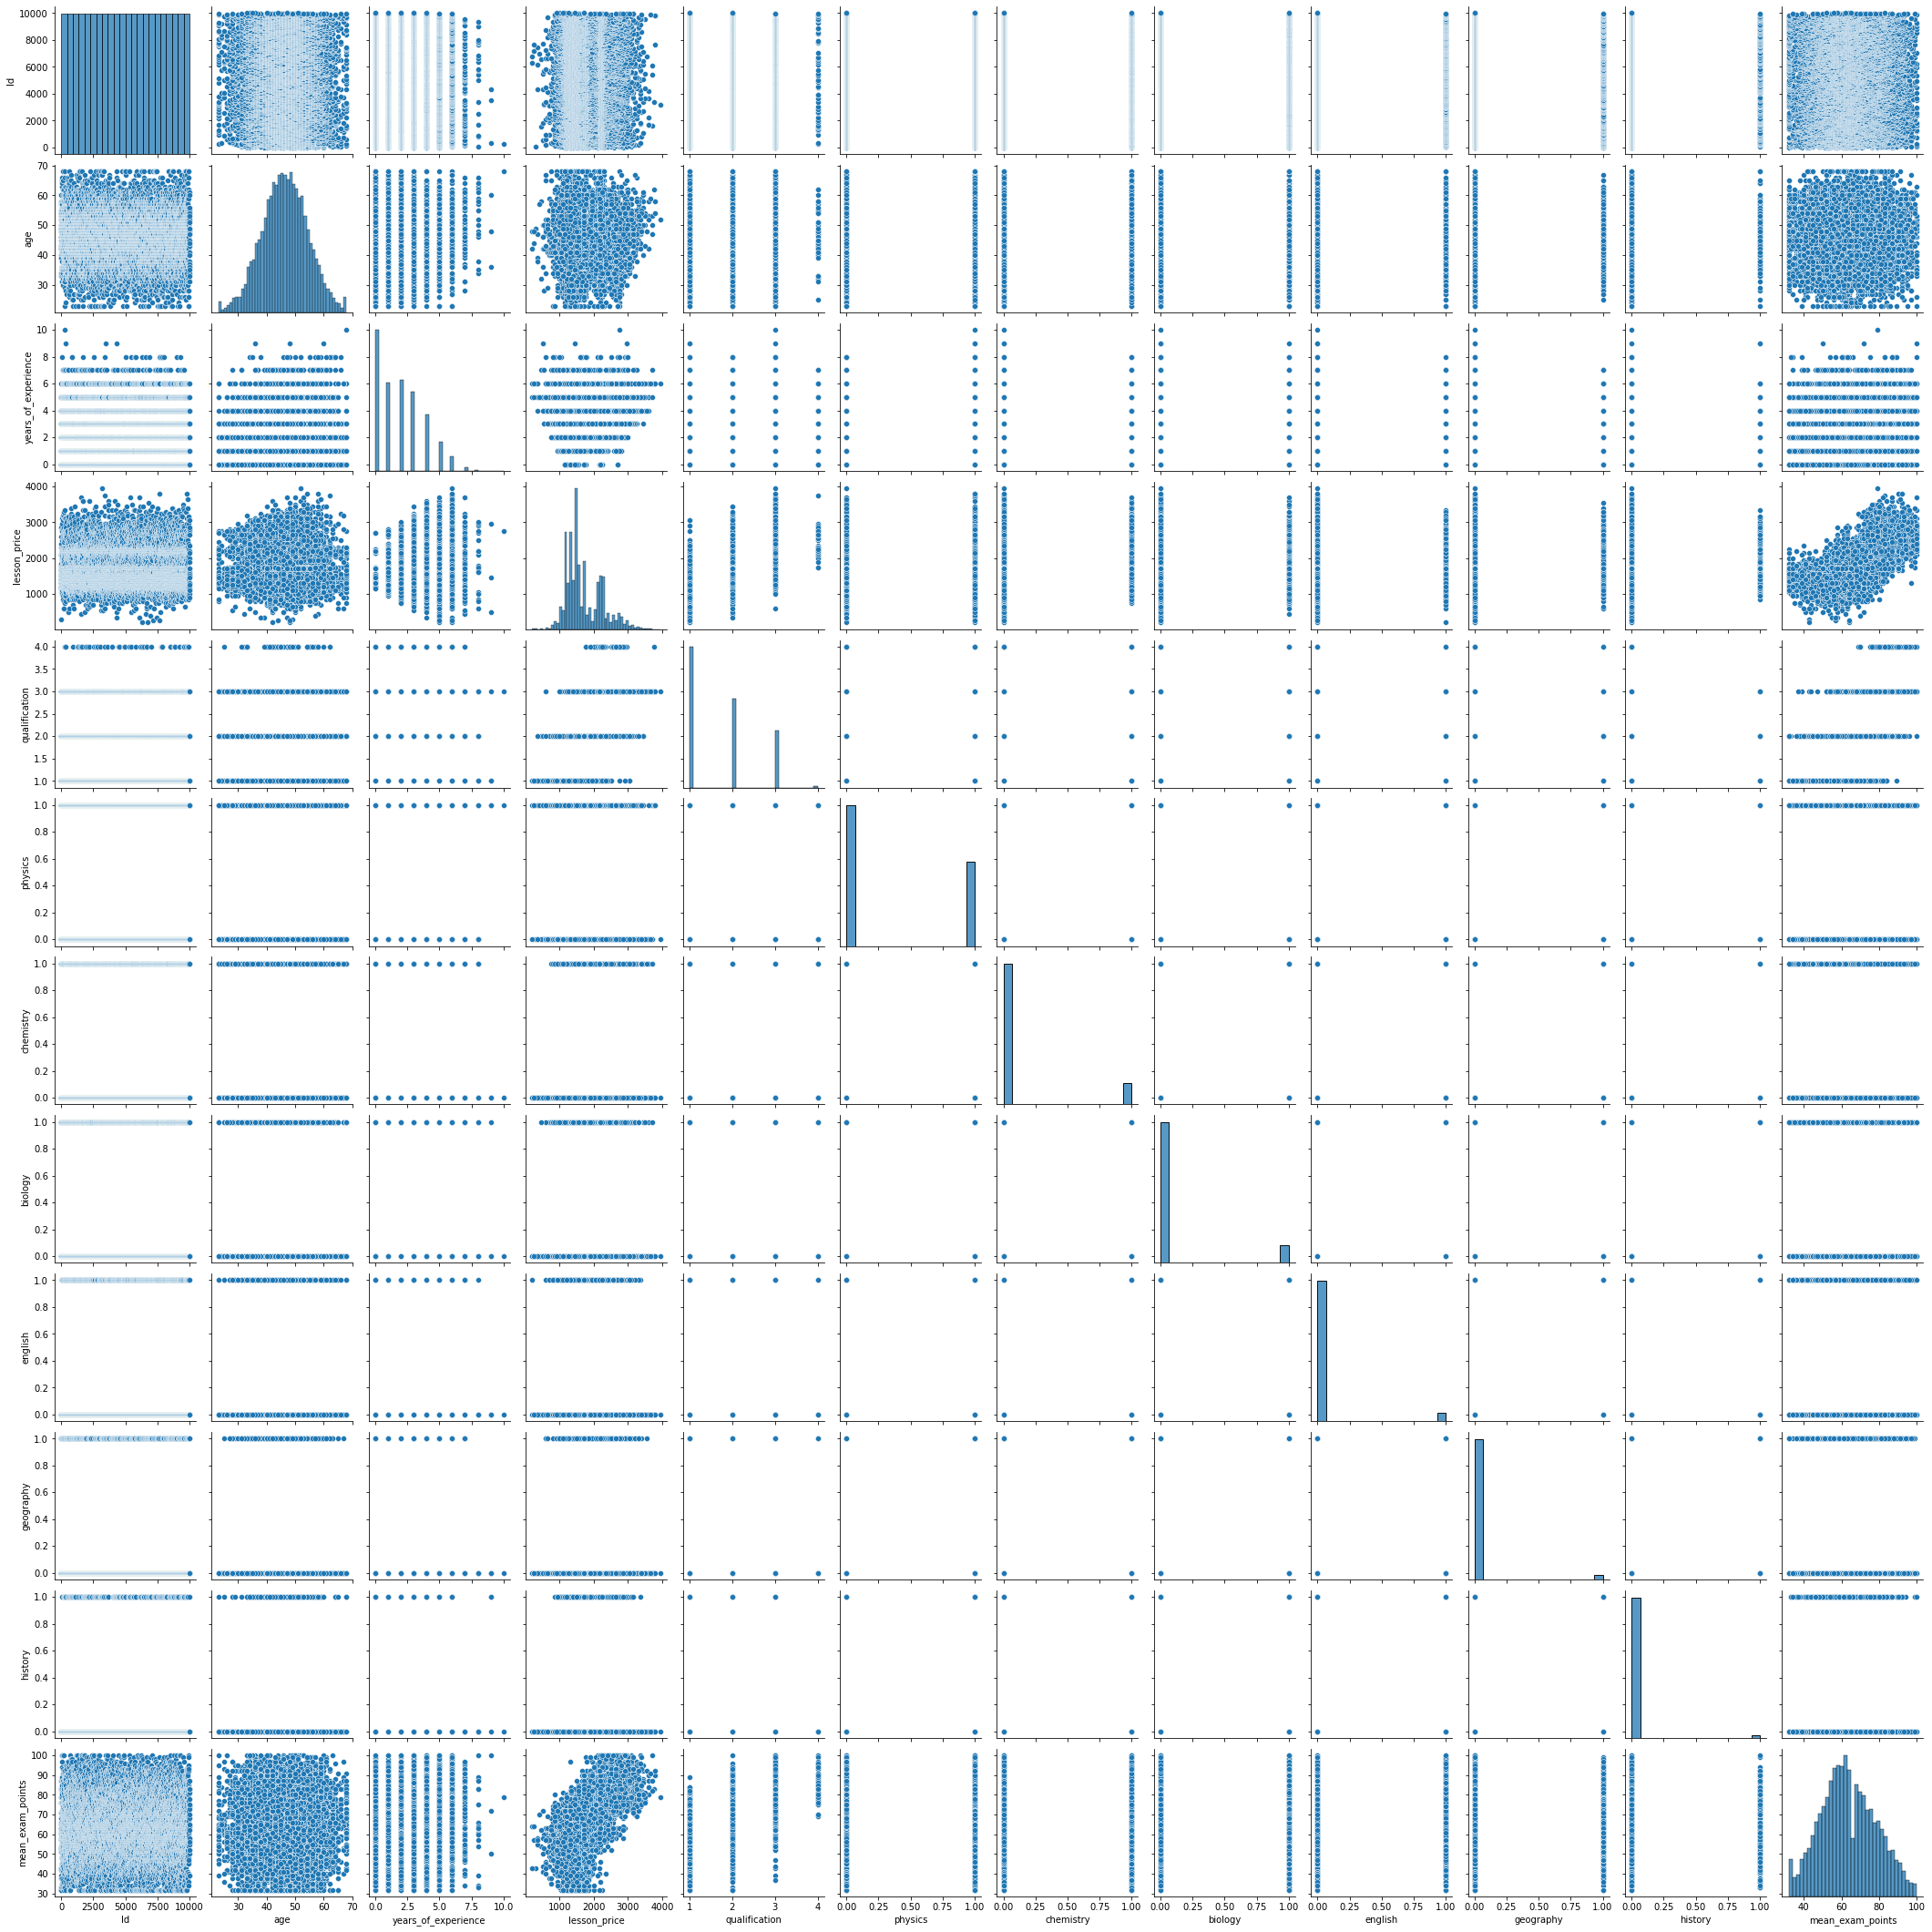

In [17]:
sns.pairplot(df_train)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [19]:
class Node:
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch

In [20]:
class Leaf:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.prediction = self.predict()
        
    def predict(self):
        prediction = self.y.mean()
        return prediction

In [21]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_sample_leaf=5):
        self.max_depth = max_depth
        self.min_sample_leaf = min_sample_leaf
        self.tree = None
        self.depth = 0
    
    def gini(self, y):
        
        impurity = 1/y.shape[0]
        
        impurity *= np.sum((y - y.mean())**2)
        
        return impurity
    
    def gain(self, left_y, right_y, root_gini):
        
        p = float(left_y.shape[0]/ (left_y.shape[0] + right_y.shape[0]))
        
        return root_gini - p * self.gini(left_y) - (1 - p) * self.gini(right_y)
    
    def split(self, x, y, t, index):
        
        left = np.where(x[:, index] <= t)
        right = np.where(x[:, index] > t)
        
        true_x = x[left]
        false_x = x[right]
        
        true_y = y[left]
        false_y = y[right]
        
        return true_x, false_x, true_y, false_y
    
    def find_best_split(self, x, y):
        
        root_gini = self.gini(y)
        
        best_gain = 0
        best_t = None
        best_index = None
        
        n_features = x.shape[1]
        
        for index in range(n_features):
            
            t_values = np.unique(x[:, index])
            
            for t in t_values:
                
                true_x, false_x, true_y, false_y = self.split(x, y, t, index)
                
                if len(true_x) < self.min_sample_leaf or len(false_x) < self.min_sample_leaf:
                    continue
                
                current_gain = self.gain(true_y, false_y, root_gini)
                
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index
                    
        return best_gain, best_t, best_index
        
    def build_tree(self, x, y):
        
        gain, t, index = self.find_best_split(x, y)
        
        if self.depth > self.max_depth:
            return(Leaf(x, y))
        
        if gain == 0:
            return(Leaf(x, y))
        
        self.depth += 1
        
        true_x, false_x, true_y, false_y = self.split(x, y, t, index)
        
        true_branch = self.build_tree(true_x, true_y)
        false_branch = self.build_tree(false_x, false_y)
        
        return Node(index, t, true_branch, false_branch)
    
    def fit(self, x, y):
        
        self.tree = self.build_tree(x, y)
        
        return self
    
    def get_prediction(self, obj, node):
        
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer
        
        if obj[node.index] <= node.t:
            return self.get_prediction(obj, node.true_branch)
        else:
            return self.get_prediction(obj, node.false_branch)
    
    def predict(self, x):
        
        predictions = []
        
        for obj in x:
            prediction = self.get_prediction(obj, self.tree)
            predictions.append(prediction)
        
        return np.array(predictions)
    

In [22]:
my_tree = DecisionTreeRegressor(max_depth=100, min_sample_leaf=50)
my_tree.fit(X_train.to_numpy(), y_train.to_numpy())

determination(y_train.to_numpy(), my_tree.predict(X_train.to_numpy()))

0.6643766280154778

In [23]:
determination(y_test.to_numpy(), my_tree.predict(X_test.to_numpy()))

0.6457404952891408

In [25]:
df_id = df_test.iloc[:, 0]
df = df_test.iloc[:, 1:]

In [26]:
df.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_id.head()

0    10000
1    10001
2    10002
3    10003
4    10004
Name: Id, dtype: int64

In [39]:
final_tree = DecisionTreeRegressor(max_depth=100, min_sample_leaf=50)
final_tree.fit(X.to_numpy(), y.to_numpy())

In [40]:
predictions = final_tree.predict(norm(df).to_numpy())

In [41]:
df_predictions = pd.DataFrame(predictions, columns=['mean_exam_points'])
df_predictions.head()

,mean_exam_points
0,53.418182
1,63.578947
2,43.483333
3,78.955931
4,78.955931


In [42]:
df_predictions = pd.concat([df_id, df_predictions], axis=1)

In [48]:
df_predictions.to_csv('predictions.csv', index=False)